<a href="https://colab.research.google.com/github/Petmoraaa/PREDICTING-CHURN-IN-TELECOMMUNICATION-INDUSTRY/blob/main/Phase_3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Understanding
Companies lose millions due to customer churn. Understanding why customers leave can help businesses take action to retain them, such as offering promotions or improving service quality.

###Problem statement
How can the company predict customer churn using historical data, and what factors contribute most to customer churn?

###Objectives
1.Build a classification model to predict churn based on customer data.
2.Compare multiple models.

3.Provide recommendations for reducing churn.

###Research Questions
1. What factors influence customer churn the most?
2. How accurately can we predict churn using available data?
3. Which classification model performs best for this problem?

#Data Understanding


In [1]:
#load the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")

print("Path to dataset files:", path)

100%|██████████| 116k/116k [00:00<00:00, 47.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/becksddf/churn-in-telecoms-dataset/versions/1


In [2]:
import zipfile
import pandas as pd
import os

#Extracting the ZIP file
with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

files = os.listdir("/content")
print("Extracted files:", files)

csv_file = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(f"/content/{csv_file}")

#first few rows
df.head()


Extracted files: ['.config', 'archive.zip', 'bigml_59c28831336c6604c800002a.csv', 'sample_data']


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#missin values
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [5]:
#class distribution
df['churn'].value_counts(normalize=True)


,proportion
churn,
False,0.855086
True,0.144914


##EDA

In [6]:
#summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

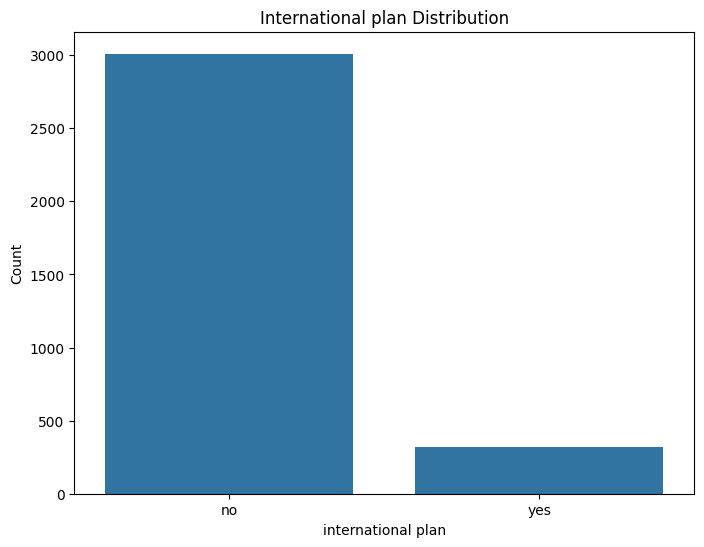

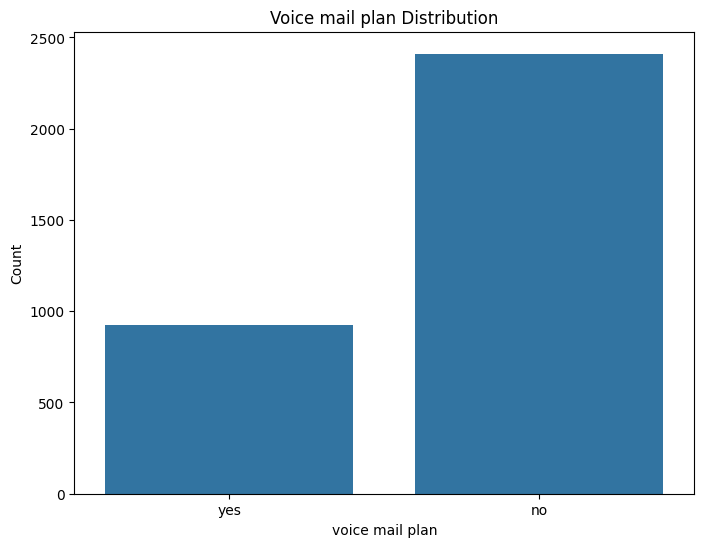

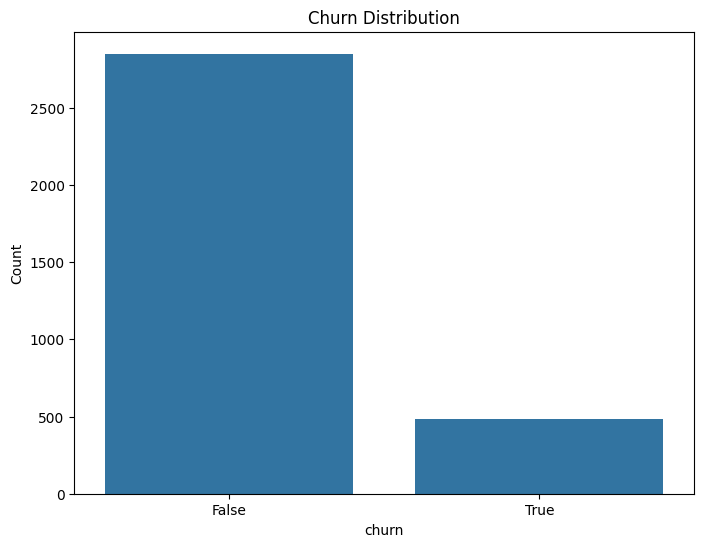

In [8]:
#Plot categorical feature distributions
categorical_cols = ['international plan', 'voice mail plan', 'churn']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


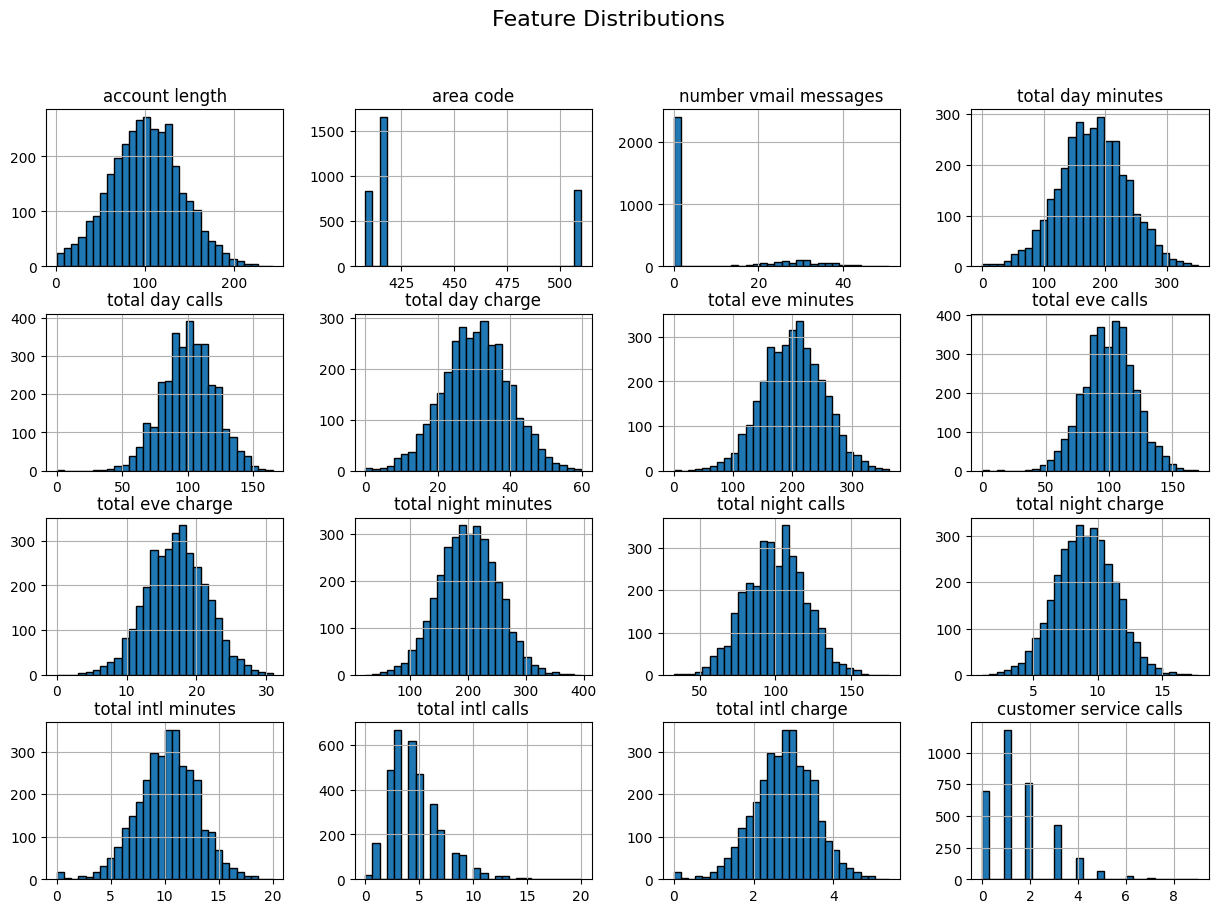

In [ ]:
#Plot distributions of numerical features
df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


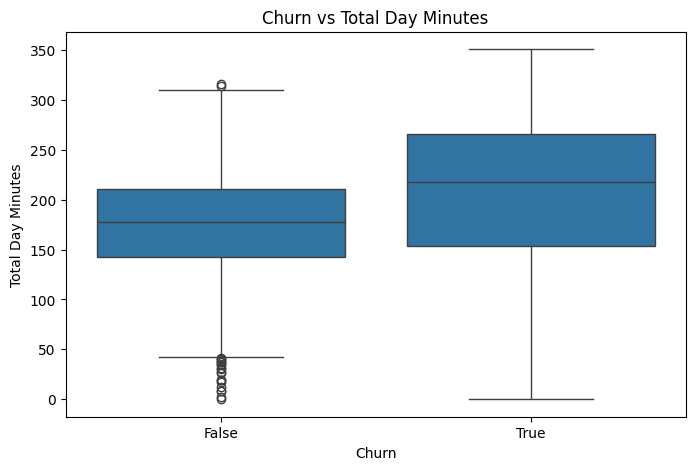

In [9]:
#churn vs numerical features
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Churn vs Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

Customers who churn tend to have higher total day minutes than those who stay.

#Preprocessing

###Correlation analysis

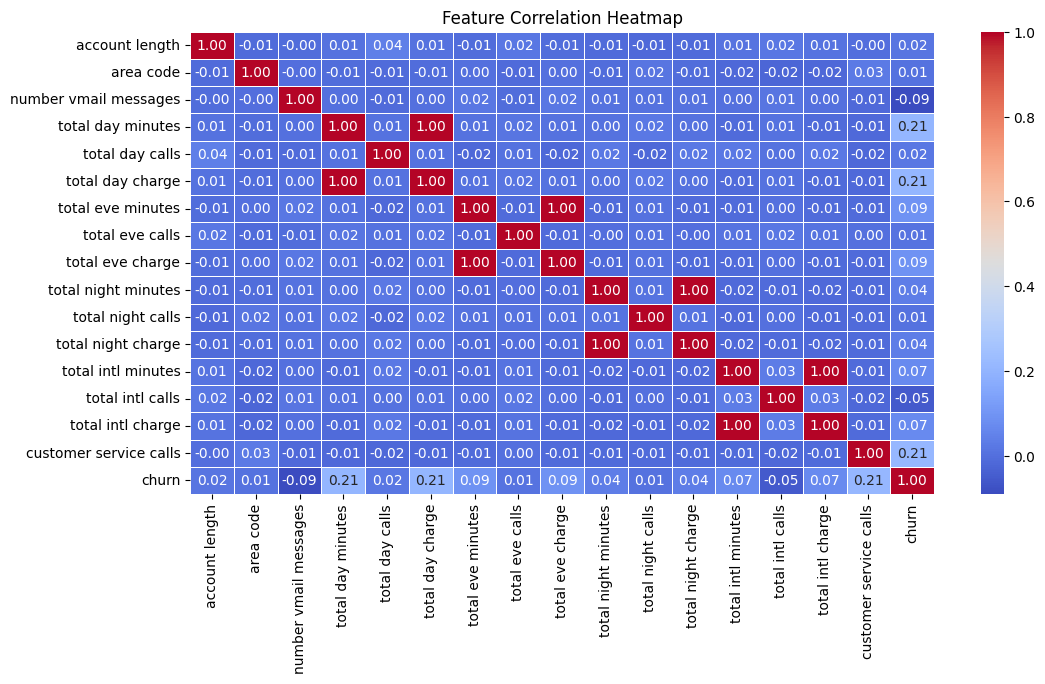

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Select only numeric columns
numeric_df = df.select_dtypes(include=['number', 'bool'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Customers with higher total day minutes are slightly more likely to churn.

Higher customer service calls correlate with higher churn.

In [11]:
#Dropping highly correlated features
df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace=True)

df.shape


(3333, 17)

##Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

#Converting categorical variables to numeric
encoder = LabelEncoder()
df['international plan'] = encoder.fit_transform(df['international plan'])
df['voice mail plan'] = encoder.fit_transform(df['voice mail plan'])
df['churn'] = df['churn'].astype(int)

#Dropping non-useful categorical features
df.drop(columns=['state', 'phone number'], inplace=True)

df.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


##Scaling


In [13]:
#standardizing
from sklearn.preprocessing import StandardScaler

#selecting numeric columns an removing target variable
features = df.drop(columns=['churn'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Converting back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['churn'] = df['churn']

df_scaled.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932,0
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932,0
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218,0
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354,0
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641,0


##Variance Inflation factor

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Selecting only numeric features (excluding target variable)
numeric_columns = df.select_dtypes(include=['number']).columns
X = df[numeric_columns].drop(columns=['churn'], errors='ignore')

# Computing VIF
vif_df = calculate_vif(X)

# Displaying VIF values
print(vif_df)


                   Feature        VIF
0           account length   7.298476
1                area code  60.999598
2       international plan   1.116556
3          voice mail plan  16.449088
4    number vmail messages  16.060222
5        total day minutes  11.469569
6          total day calls  23.588677
7        total eve minutes  15.606325
8          total eve calls  23.725547
9      total night minutes  15.756057
10       total night calls  24.623674
11      total intl minutes  13.664469
12        total intl calls   4.272018
13  customer service calls   2.404659


In [ ]:
#droping high vif features
#Droping features with high multicollinearity
df.drop(columns=['area code', 'voice mail plan', 'number vmail messages',
                 'total day minutes', 'total eve minutes', 'total night minutes',
                 'total intl minutes', 'total day calls', 'total eve calls', 'total night calls'], inplace=True)

#Recalculating VIF
X_new = df.select_dtypes(include=['number']).drop(columns=['churn'], errors='ignore')
vif_df_new = calculate_vif(X_new)

#Displaying updated VIF values
print(vif_df_new)


                  Feature       VIF
0          account length  3.623377
1      international plan  1.102547
2        total intl calls  3.185682
3  customer service calls  2.110999


###Train_test split

In [15]:
from sklearn.model_selection import train_test_split

#Defining feature columns (excluding the target variable)
sel_columns = ['account length', 'international plan', 'customer service calls', 'total intl calls']
X = df[sel_columns]  # Select features

#Defining target variable
y = df['churn']  # Target variable (churn: 1 = left, 0 = stayed)

#Spliting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying test labels
y_test.head()


,churn
438,0
2674,0
1345,1
1957,0
2148,0


#Modeling

###Baseline model logistic

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initializing the logistic regression model
log_model = LogisticRegression(random_state=42)

#Training the model on the training data
log_model.fit(X_train, y_train)

#Making predictions on the test data
y_pred = log_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Logistic Regression Accuracy: {accuracy:.4f}")

#Displaying classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Displaying confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Baseline Logistic Regression Accuracy: 0.8486

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.50      0.11      0.18       101

    accuracy                           0.85       667
   macro avg       0.68      0.54      0.55       667
weighted avg       0.81      0.85      0.80       667


Confusion Matrix:
[[555  11]
 [ 90  11]]


###Traning and evaluating all the models

In [17]:
#training all models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Defining models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

#Training and evaluating each model
for name, model in models.items():
    print(f"\n🔹 Training & Evaluating: {name} 🔹")

    #Training model
    model.fit(X_train, y_train)

    #Making predictions
    y_pred = model.predict(X_test)

    #Evaluating performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {accuracy:.4f}")

    #Displaying classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    #Displaying confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("="*50)



🔹 Training & Evaluating: Logistic Regression 🔹
✅ Accuracy: 0.8486

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.50      0.11      0.18       101

    accuracy                           0.85       667
   macro avg       0.68      0.54      0.55       667
weighted avg       0.81      0.85      0.80       667


Confusion Matrix:
[[555  11]
 [ 90  11]]

🔹 Training & Evaluating: Decision Tree 🔹
✅ Accuracy: 0.8681

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       566
           1       0.78      0.18      0.29       101

    accuracy                           0.87       667
   macro avg       0.83      0.58      0.61       667
weighted avg       0.86      0.87      0.83       667


Confusion Matrix:
[[561   5]
 [ 83  18]]

🔹 Training & Evaluating: Random Forest 🔹
✅ Accuracy: 0.8351

Classification Report:
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Confusion matrix subplots

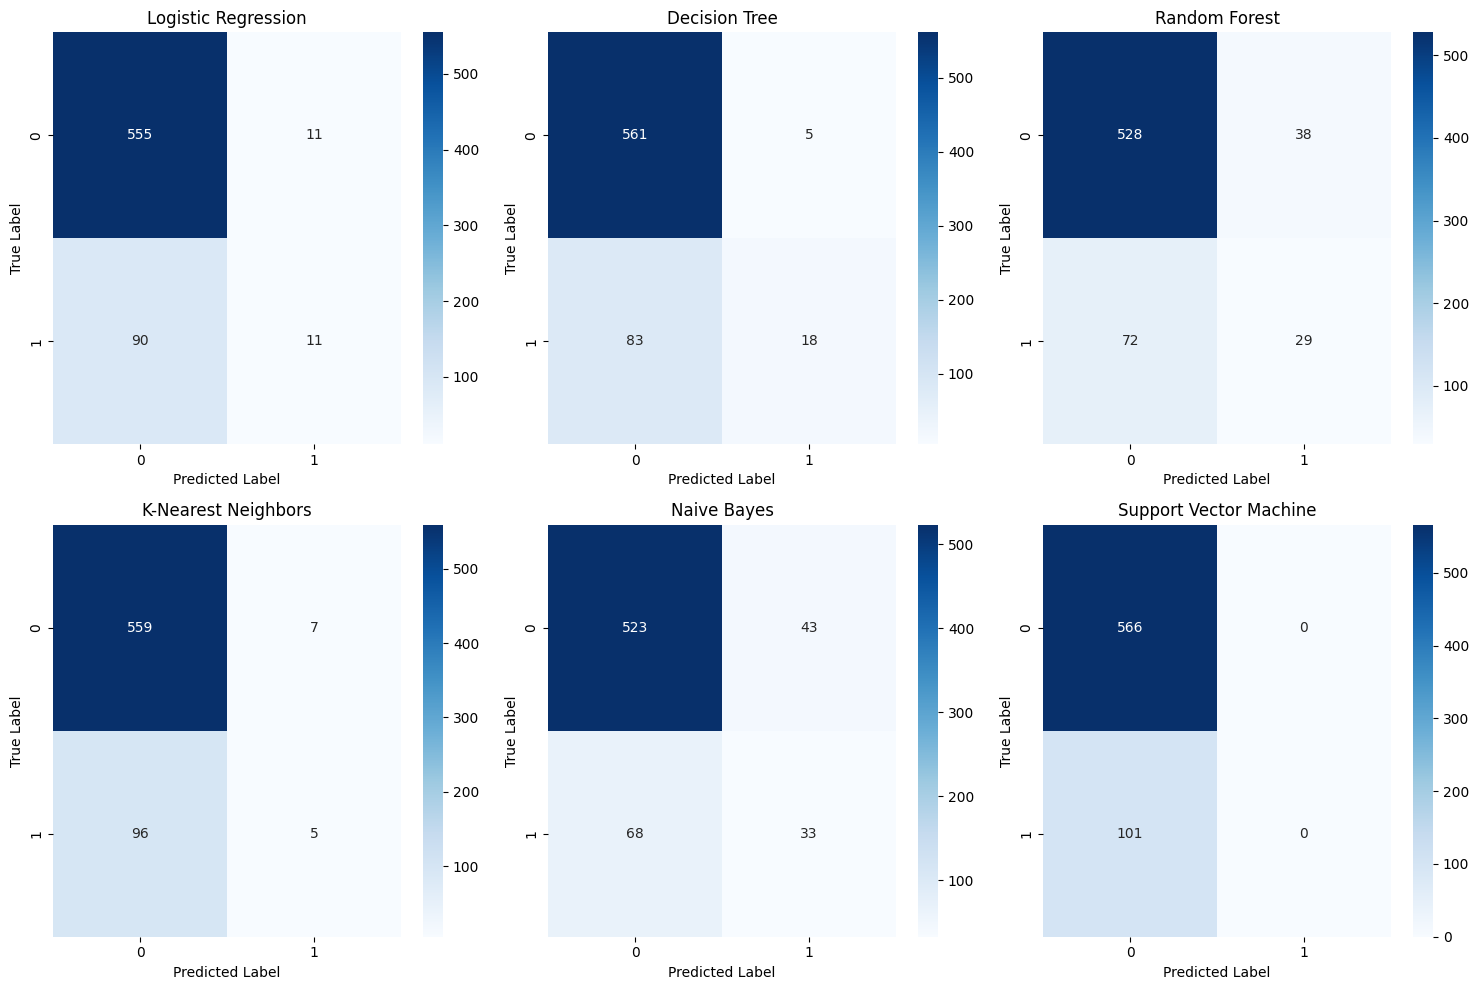

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Defining models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

#Training models and get confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    #Plotting confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


###Model accuracy comparison

<ipython-input-19-67a6ee230649>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")


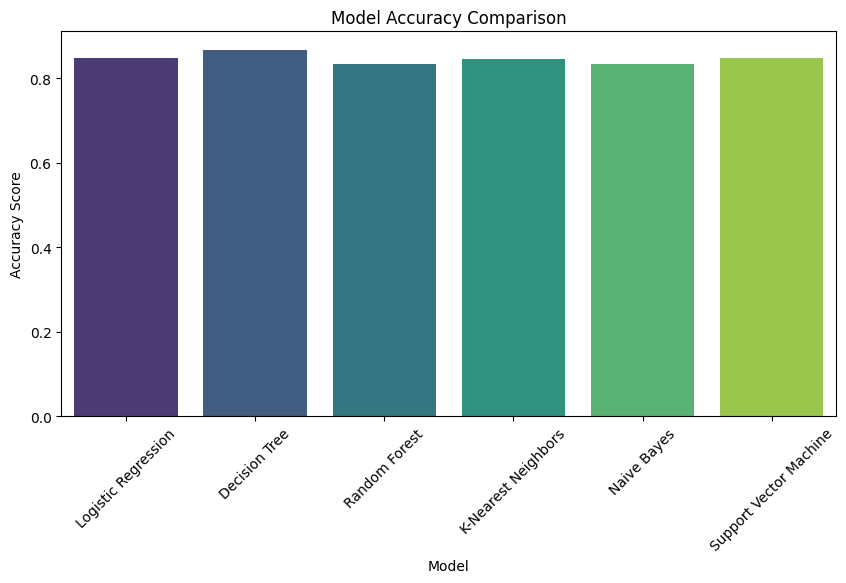

In [19]:
import numpy as np

#Defining models again
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

#Storing accuracy scores
model_names = []
accuracy_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    model_names.append(name)
    accuracy_scores.append(accuracy)

#Plotting accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()


Decision Tree performed the best with an accuracy of 87%

##Hyperparameter tuning

In [22]:
#hyperparameter tuning for decision tree
from sklearn.model_selection import GridSearchCV

#Defining hyperparameters to tune
param_grid_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initializing GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

#Getting best parameters
best_dt_params = grid_search_dt.best_params_
print("✅ Best Decision Tree Parameters:", best_dt_params)

#Training the best model
best_dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
best_dt_model.fit(X_train, y_train)

#Evaluating performance
y_pred_dt = best_dt_model.predict(X_test)
print("\n🔹 Decision Tree Accuracy after Tuning:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


✅ Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

🔹 Decision Tree Accuracy after Tuning: 0.8665667166416792
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       566
           1       0.80      0.16      0.26       101

    accuracy                           0.87       667
   macro avg       0.83      0.58      0.60       667
weighted avg       0.86      0.87      0.83       667



In [23]:
#hyperparameter tuning for Random forest
#Defining hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initializing GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

#Getting best parameters
best_rf_params = grid_search_rf.best_params_
print("✅ Best Random Forest Parameters:", best_rf_params)

#Training the best model
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

#Evaluating performance
y_pred_rf = best_rf_model.predict(X_test)
print("\n🔹 Random Forest Accuracy after Tuning:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔹 Random Forest Accuracy after Tuning: 0.8755622188905547
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       566
           1       0.72      0.29      0.41       101

    accuracy                           0.88       667
   macro avg       0.81      0.63      0.67       667
weighted avg       0.86      0.88      0.85       667



Random Forest is the best model as it has 88% accuracy and 29% recall for customers who churn.

###Reccomendations
1.Fix Customer Service Issues-Customers who frequently contact customer service seem more likely to churn.The company should analyze complaints, do follow ups and improve support quality to reduce frustration.

2.Give customers a reason to stay- The company should offer targeted discounts, loyalty rewards, or better service packages to high risk customers.

3.Make International Plans more appealing-Provide competitive pricing or exclusive benefits to international plan users as they are likely to churn.

4.Improve Churn Prediction-The model misses many customers who leave. Refining data, exploring new techniques, and continuously updating it can help identify more at-risk customers.

##Conclusion

After analyzing customer churn, we found that the Random Forest model performs best, with 88% accuracy. However, its recall for predicting churners is only 29%, meaning it struggles to identify many customers who are about to leave. This shows that while the model is useful, it is not catching everyone at risk. We need to take extra steps beyond just relying on predictions.

At the end of the day, happy customers stay longer. By addressing frustrations early, offering real value, and improving prediction accuracy, the company can build lasting customer relationships.